In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [2]:
df  = pd.read_csv('/content/bill_authentication.csv')
df.sample(10)

,Variance,Skewness,Curtosis,Entropy,Class
1227,-2.56400,-1.7051,1.50260,0.32757,1
886,-1.65140,-8.4985,9.11220,1.23790,1
1326,-1.29430,2.6735,-0.84085,-2.03230,1
938,-4.37730,-5.5167,10.93900,-0.40820,1
300,0.32920,-4.4552,4.57180,-0.98880,0
1202,-0.70346,2.9570,-3.59470,-3.14570,1
241,-1.39310,1.5664,7.53820,0.78403,0
1051,-3.77470,2.5162,0.83341,-0.30993,1
579,1.15880,8.9331,-2.08070,-1.12720,0
825,-2.23400,-7.0314,7.49360,0.61334,1


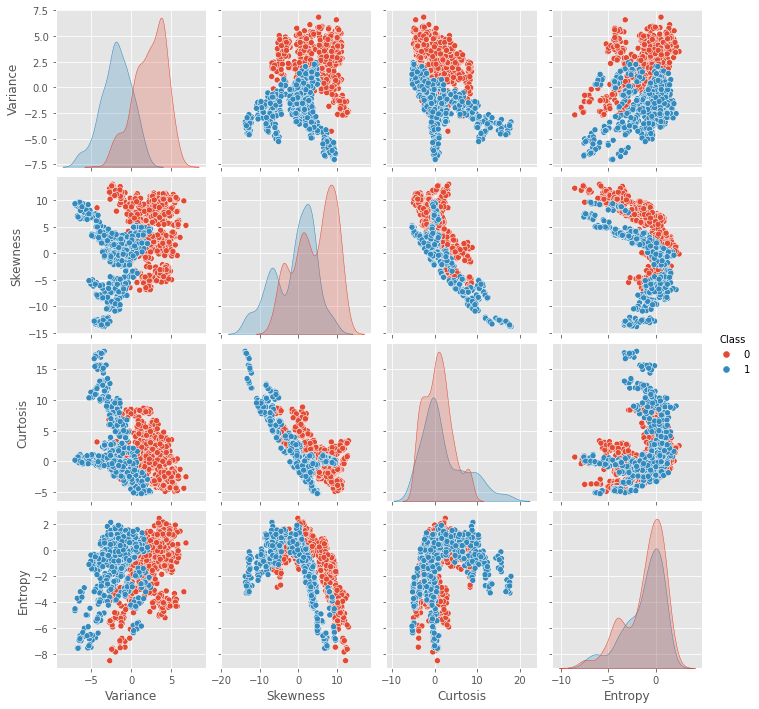

In [3]:
sns.pairplot(df,hue='Class')
plt.show()

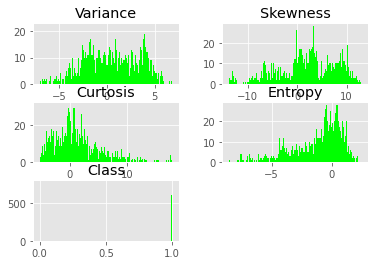

In [4]:
df.hist(bins=200,color='lime')
plt.show()

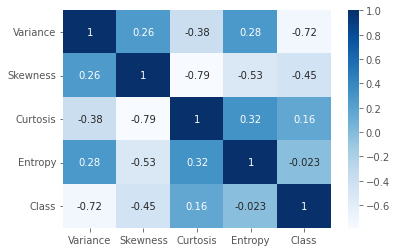

In [5]:
sns.heatmap(df.corr().round(3),annot=True,cmap='Blues')
plt.show()

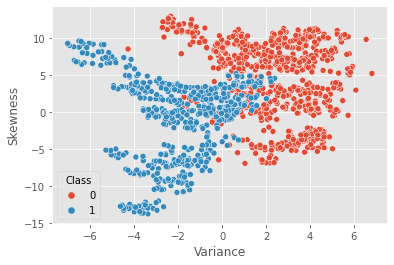

In [6]:
sns.scatterplot(x=df['Variance'],y=df['Skewness'] ,hue=df.Class)
plt.show()

In [7]:
X = df.drop(columns=['Entropy','Class'])
Y = df['Class']

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
scale = MinMaxScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_train, X_test, Y_train, Y_test = tts(X_scaled,Y,train_size = 0.80,random_state = 50)

In [16]:
#@title Linearly seperable Kernel
from sklearn.svm import SVC
svc_l = SVC(kernel='linear')
svc_l.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

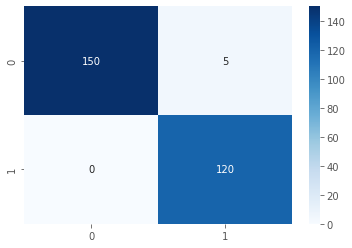

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve,accuracy_score,precision_recall_curve,roc_curve
sns.heatmap(confusion_matrix(Y_test,svc_l.predict(X_test)),annot=True,fmt='g',cmap='Blues')
plt.show()

In [18]:
print(classification_report(Y_test,svc_l.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       155
           1       0.96      1.00      0.98       120

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



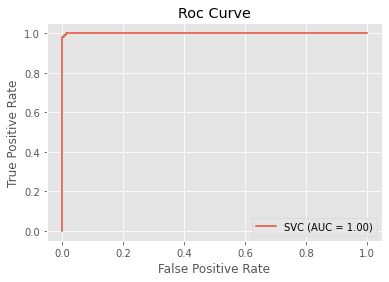

In [19]:
plot_roc_curve(svc_l,X_test,Y_test)
plt.title('Roc Curve')
plt.show()

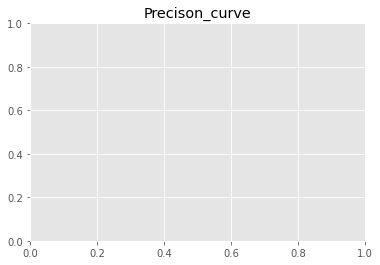

In [23]:
precision_recall_curve(Y_test,svc_l.predict(X_test))
plt.title('Precison_curve')
plt.show()

In [30]:
#@title Non-Linearly seperable Kernel
from sklearn.svm import SVC
svc_p = SVC(C=1.0,kernel='rbf')
svc_p.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

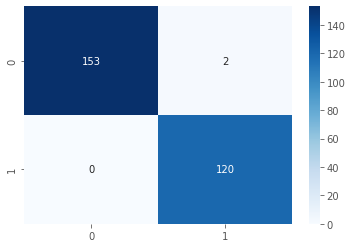

In [26]:
sns.heatmap(confusion_matrix(Y_test,svc_p.predict(X_test)),annot=True,fmt='g',cmap='Blues')
plt.show()

In [27]:
print(classification_report(Y_test,svc_p.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       155
           1       0.98      1.00      0.99       120

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



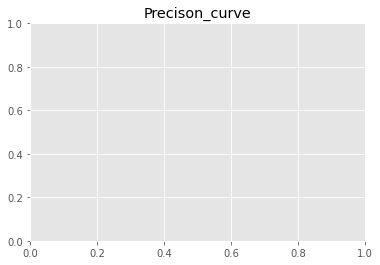

In [78]:
precision_recall_curve(Y_test,svc_p.predict(X_test))
plt.title('Precison_curve')
plt.show()

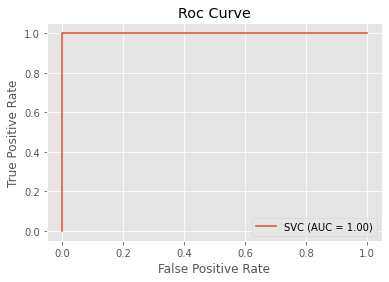

In [79]:
plot_roc_curve(svc_p,X_test,Y_test)
plt.title('Roc Curve')
plt.show()